# Python 網路爬蟲 PART 3 - 台灣證券交易所 (TWSE) 股票資料視覺化與分析

2023/05/07

> ### [ REFERENCE ]

> + "**`繪製 K 線圖`**" 
    https://ithelp.ithome.com.tw/articles/10206894
> + Luke Posey, "**`Implementing Moving Averages in Python`**", Towards Data Science.
    https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d


> ###  安裝 金融分析套件
+ #### In Anaconda Prompt > 
   `pip install pandas_datareader`
   
+ #### In Anaconda Prompt > 
   `pip install /Users/macmini1/Documents/bigDataSpark/大葉大學/ipynb_files/mpl-finance-master.zip`
   + 先下載套件： https://github.com/matplotlib/mpl_finance/archive/master.zip
   
+ #### In Anaconda Prompt >
   `pip install yfinance`

In [1]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader.data as pdr

# visual
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

C:\Users\appcl\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


> ### < 從 Yahoo Finance 下載個股資料 >  2330 台積電 (TSMC) 

In [21]:
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

start = "2020-07-01"
end = "2023-06-01"
df_2330 = pdr.get_data_yahoo('2330.TW', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [22]:
df_2330

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,315.0,318.0,314.0,317.5,300.518250,29532342
2020-07-02,319.0,322.0,318.0,322.0,304.777557,34526178
2020-07-03,327.0,330.5,326.5,329.5,311.876465,53341987
2020-07-06,332.5,338.0,332.0,338.0,319.921844,57256220
2020-07-07,343.5,346.0,338.0,338.5,320.395050,59046323
...,...,...,...,...,...,...
2023-04-28,498.5,502.0,498.0,502.0,502.000000,24824100
2023-05-02,500.0,502.0,496.5,501.0,501.000000,15325791
2023-05-03,496.0,498.0,495.0,496.0,496.000000,11369311


> ### < 繪製 Ｋ線 >  2330 台積電 (TSMC)

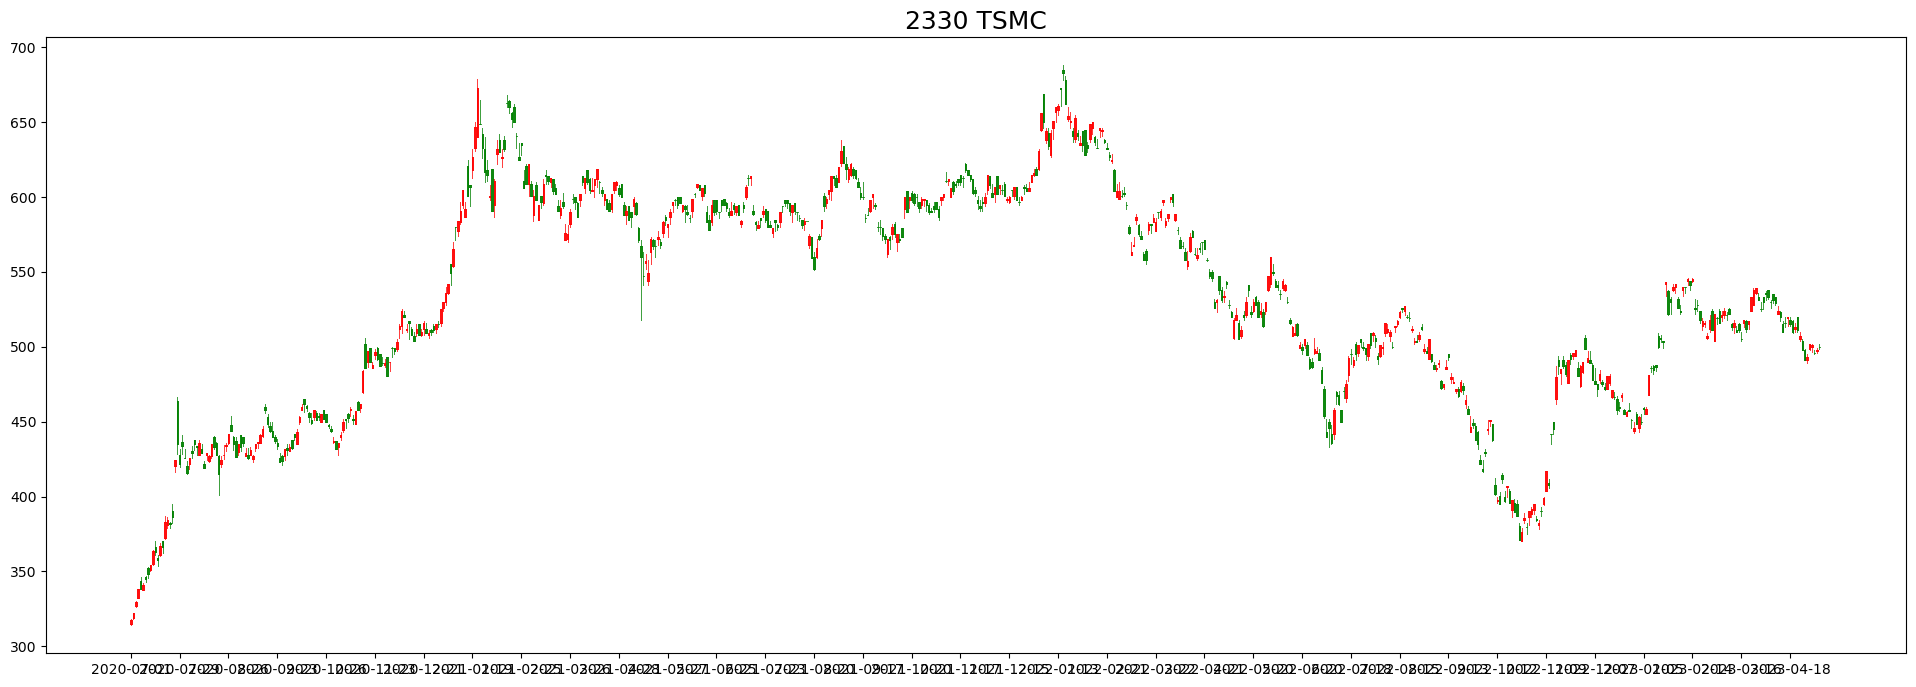

In [23]:
df_2330.index = df_2330.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330.index), 20))
ax.set_xticklabels(df_2330.index[::20])
plt.title("2330 TSMC", fontsize=18)
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

In [24]:
df_2330.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-01,315.0,318.0,314.0,317.5,300.518250,29532342
2020-07-02,319.0,322.0,318.0,322.0,304.777557,34526178
2020-07-03,327.0,330.5,326.5,329.5,311.876465,53341987
2020-07-06,332.5,338.0,332.0,338.0,319.921844,57256220
2020-07-07,343.5,346.0,338.0,338.5,320.395050,59046323


In [25]:
df_2330.tail()

,Open,High,Low,Close,Adj Close,Volume
2023-04-28,498.5,502.0,498.0,502.0,502.0,24824100
2023-05-02,500.0,502.0,496.5,501.0,501.0,15325791
2023-05-03,496.0,498.0,495.0,496.0,496.0,11369311
2023-05-04,497.0,499.5,496.0,498.0,498.0,13140291
2023-05-05,500.0,502.0,498.5,500.0,500.0,7488897


In [27]:
df_2330.shape

(693, 6)

> ### < 繪製 20日 ＆ 60日 移動均線 >  2330 台積電 (TSMC)

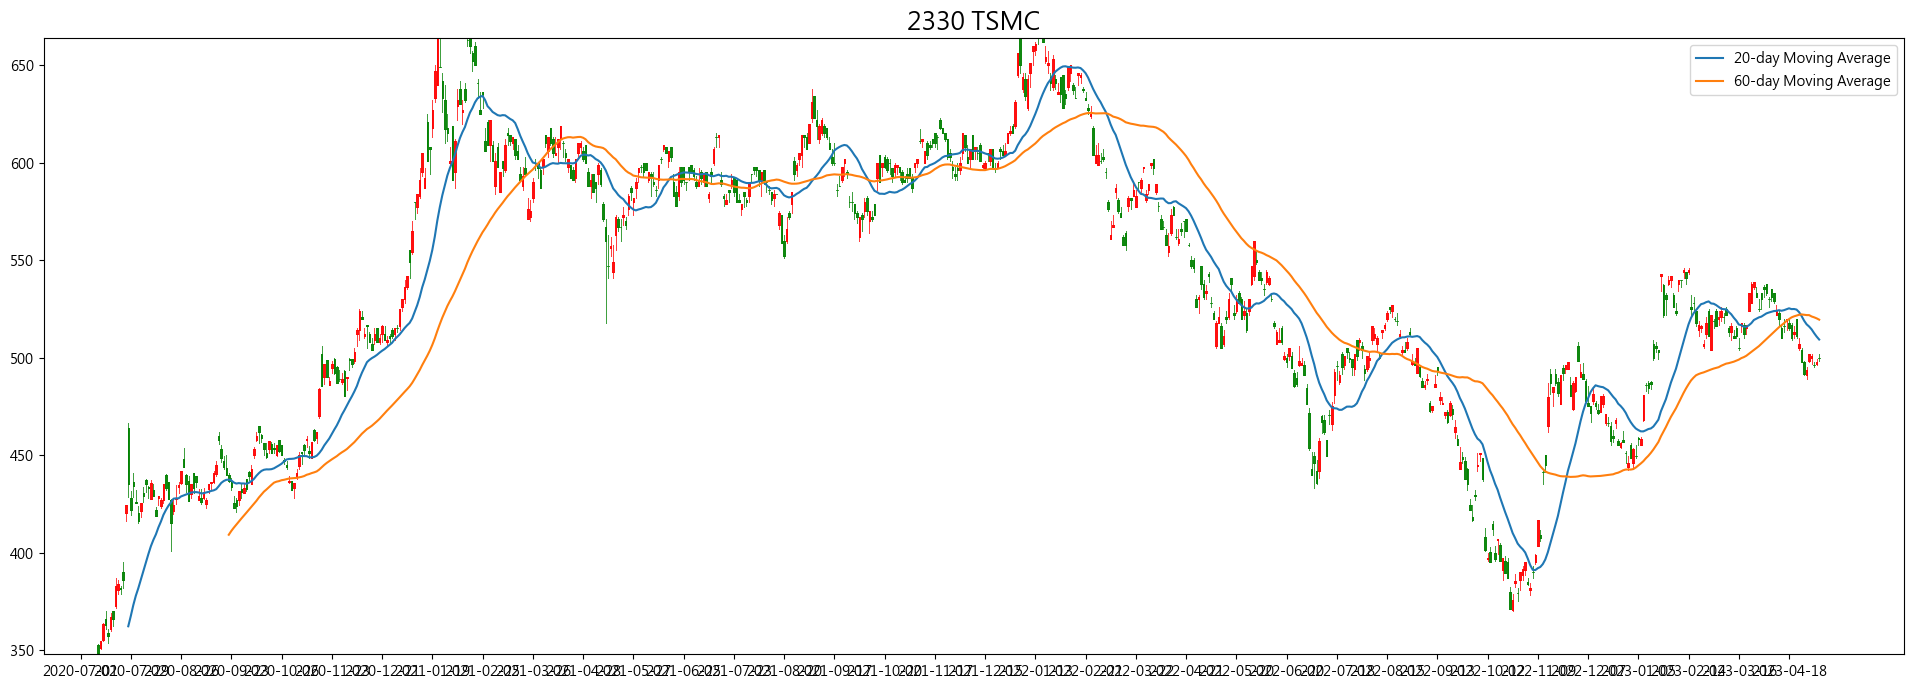

In [28]:
# 計算 20日 ＆ 60日 移動均線
sma_20 = df_2330['Close'].rolling(window=20).mean()
sma_60 = df_2330['Close'].rolling(window=60).mean()

# 繪製 Ｋ線
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330.index), 20))
ax.set_xticklabels(df_2330.index[::20])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 

# 繪製 20日 ＆ 60日 移動均線
ax.plot(sma_20, label='20-day Moving Average')
ax.plot(sma_60, label='60-day Moving Average')
plt.title("2330 TSMC", fontsize=18)
ax.legend();

> ### < 繪製 成交量 >  2330 台積電 (TSMC) : 2018/06 ~ 2019/05

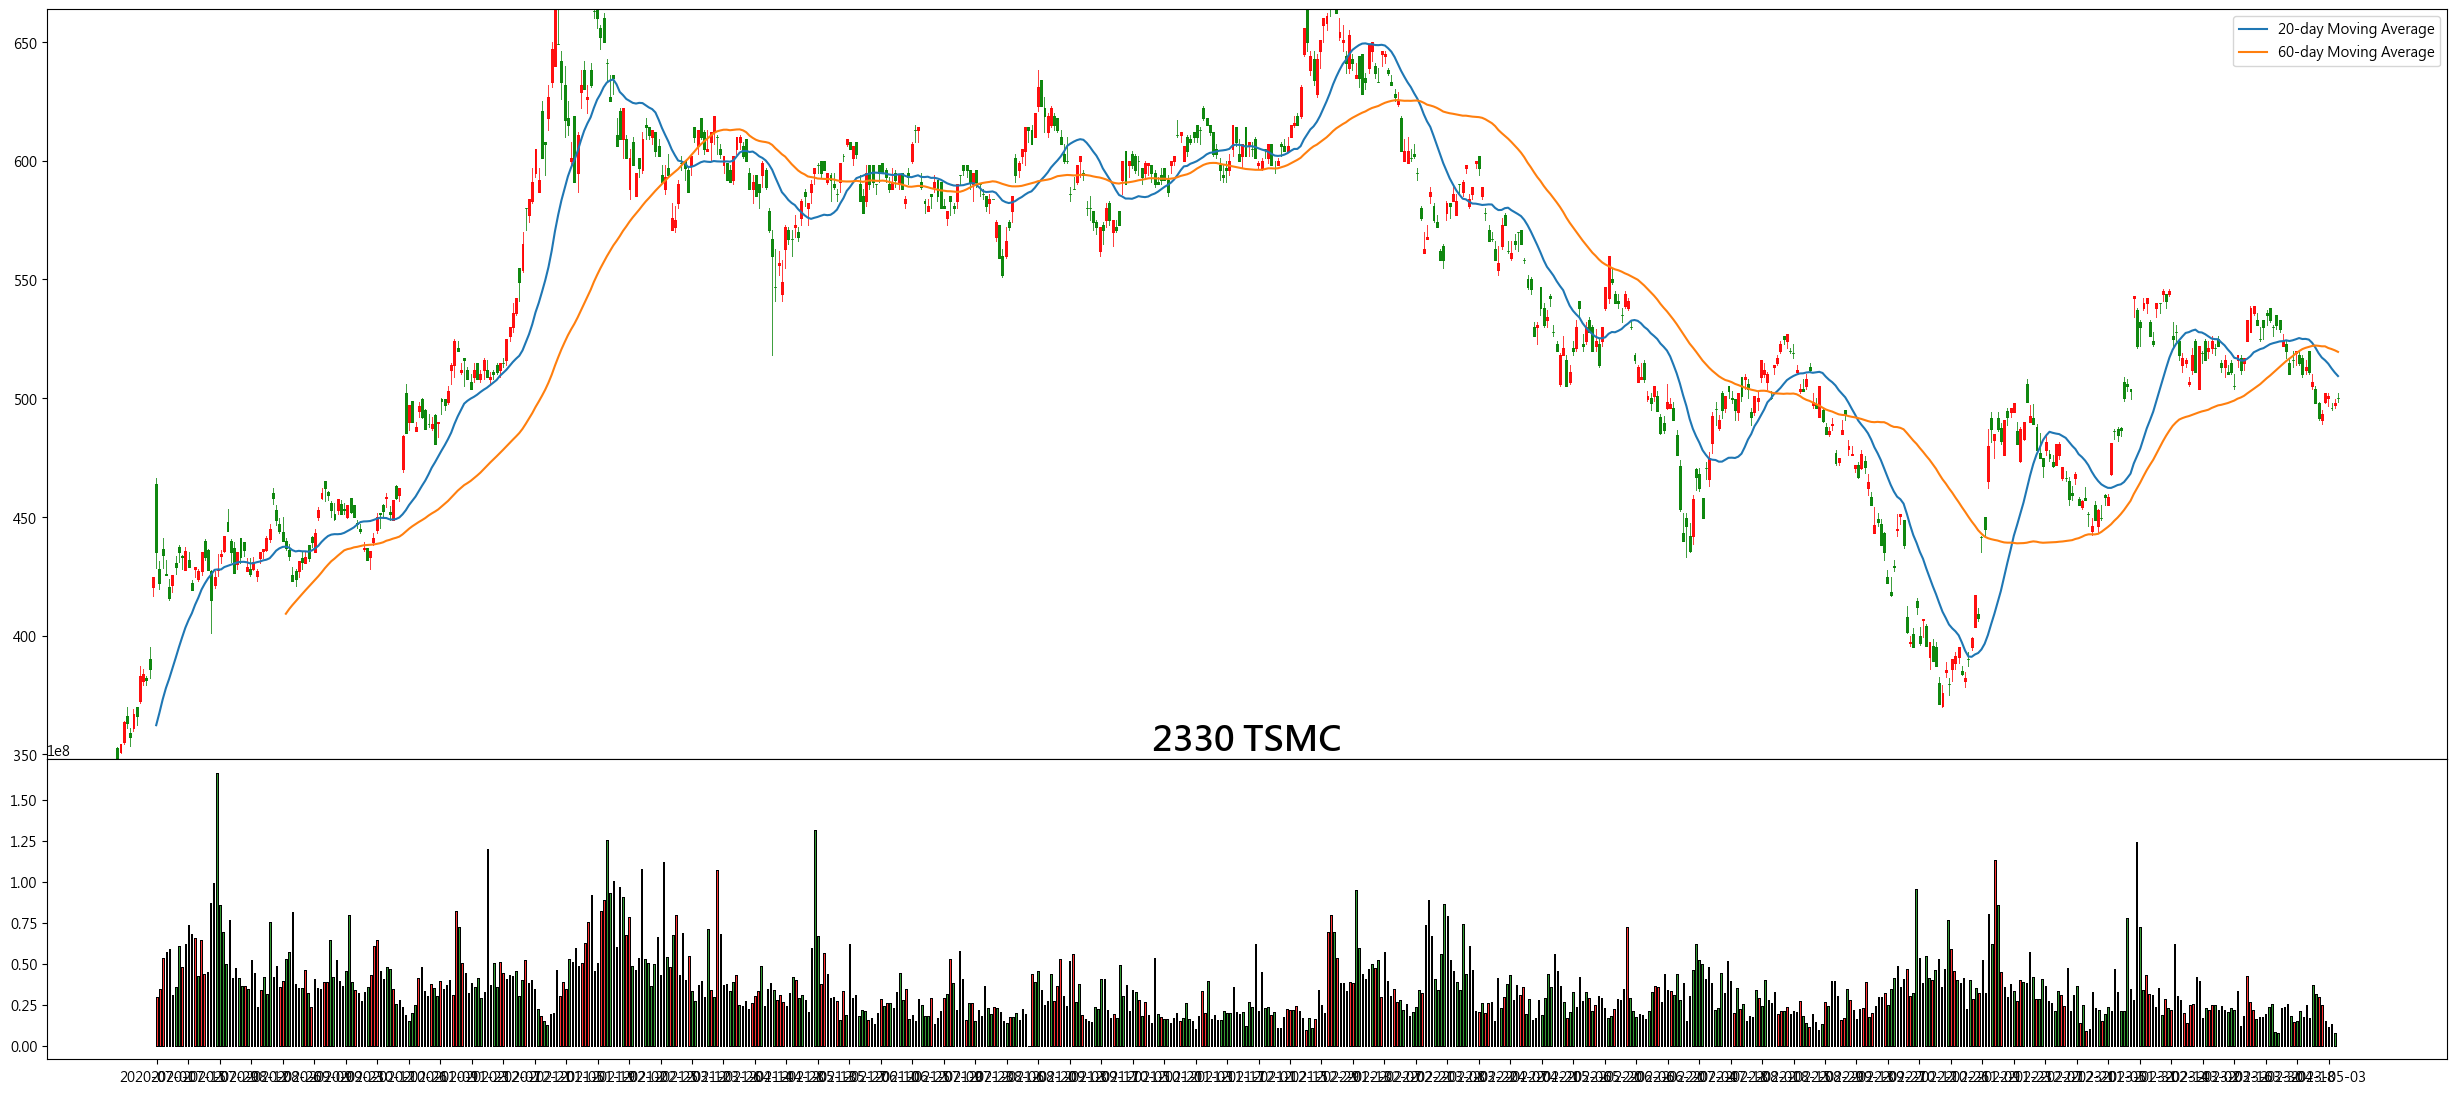

In [29]:
# 計算 20日 ＆ 60日 移動均線
sma_20 = df_2330['Close'].rolling(window=20).mean()
sma_60 = df_2330['Close'].rolling(window=60).mean()

# 繪製 Ｋ線
fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 20))
ax.set_xticklabels(df_2330.index[::20])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 

# 繪製 20日 ＆ 60日 移動均線
ax.plot(sma_20, label='20-day Moving Average')  #  20日均線
ax.plot(sma_60, label='60-day Moving Average')  #  60日均線

# 繪製 成交量
mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])
plt.title("2330 TSMC",fontsize=25, fontweight='bold', loc='center')
ax.legend();

##  [ Exercise 7-1 ]: 
> ### 請將 台積電 2018/06 ~ 2019/05 個股資料，加繪 10日 均線，並找出 10日-20日均線策略的 `黃金交叉` 和 `死亡交叉` 點。

##  [ Exercise 7-2 ]: 
> ### 請下載 中鋼、日月光、鴻海、廣達、富邦 2018/06 ~ 2019/05 個股資料，並繪製 Ｋ 線、10日-20日-60日均線 和 成交量圖。